In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [18]:
import pandas as pd

df = pd.read_csv('./data/en2020.csv', delimiter='|')

df.head()

,Codigo PAIS,Nombre PAIS,Codigo DEPARTAMENTO,Nombre DEPARTAMENTO,Codigo PROVINCIA,Nombre PROVINCIA,Codigo MUNICIPIO,Nombre MUNICIPIO,Codigo RECINTO,Nombre RECINTO,...,FPV,JUNTOS,LIBRE-21,MAS-IPSP,PAN-BOL,BLANCOS,EMITIDOS,INSCRITOS,NULOS,VALIDOS
0,BO,BOLIVIA,1,CHUQUISACA,101,OROPEZA,10101,SUCRE,279400522,COL. BERNARDO MONTEAGUDO,...,2,0,0,23,0,0,136,161,0,136
1,BO,BOLIVIA,1,CHUQUISACA,101,OROPEZA,10101,SUCRE,279400515,LICEO MARÍA JOSEFA MUJIA,...,1,0,0,18,0,1,183,220,4,178
2,BO,BOLIVIA,1,CHUQUISACA,101,OROPEZA,10101,SUCRE,279425033,UNIDAD EDUCATIVA RUFFO,...,4,0,0,135,0,5,205,220,12,188
3,BO,BOLIVIA,1,CHUQUISACA,101,OROPEZA,10101,SUCRE,279425526,U.E. EDUARDO ABAROA,...,2,0,0,23,0,0,187,220,4,183
4,BO,BOLIVIA,1,CHUQUISACA,101,OROPEZA,10101,SUCRE,279430006,POLIGIMNASIO MAX TOLEDO (TEMPORAL),...,1,0,0,18,1,1,197,220,1,195


In [7]:
df.describe()

,Codigo DEPARTAMENTO,Codigo PROVINCIA,Codigo MUNICIPIO,Codigo RECINTO,Codigo MESA,Nombre MESA,ADN,CC,CREEMOS,FPV,JUNTOS,LIBRE-21,MAS-IPSP,PAN-BOL,BLANCOS,EMITIDOS,INSCRITOS,NULOS,VALIDOS
count,34157.000000,34157.000000,34157.000000,3.415700e+04,34157.000000,34157.000000,34157.0,34157.000000,34157.000000,34157.000000,34157.0,34157.0,34157.000000,34157.000000,34157.000000,34157.000000,34157.000000,34157.000000,34157.000000
mean,4.297099,433.630208,43364.958164,1.697964e+08,46256.296630,46256.296630,0.0,51.195304,24.685130,2.711128,0.0,0.0,96.079954,0.882601,2.643558,184.836461,205.852241,6.638786,175.554118
std,2.292987,228.881936,22887.831222,9.163422e+07,22931.499605,22931.499605,0.0,42.564525,39.419059,2.409364,0.0,0.0,53.941606,1.279085,3.346317,38.565041,41.350014,5.820427,38.120109
min,1.000000,101.000000,10101.000000,9.302451e+06,10001.000000,10001.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000
25%,2.000000,202.000000,20205.000000,8.203004e+07,26681.000000,26681.000000,0.0,20.000000,1.000000,1.000000,0.0,0.0,49.000000,0.000000,1.000000,189.000000,220.000000,3.000000,176.000000
50%,3.000000,313.000000,31303.000000,1.838004e+08,36006.000000,36006.000000,0.0,37.000000,3.000000,2.000000,0.0,0.0,90.000000,0.000000,2.000000,197.000000,220.000000,6.000000,188.000000
75%,7.000000,701.000000,70101.000000,2.278050e+08,72231.000000,72231.000000,0.0,76.000000,36.000000,4.000000,0.0,0.0,142.000000,1.000000,3.000000,203.000000,220.000000,8.000000,196.000000
max,9.000000,905.000000,90503.000000,4.367261e+08,90403.000000,90403.000000,0.0,190.000000,166.000000,31.000000,0.0,0.0,227.000000,29.000000,52.000000,235.000000,239.000000,123.000000,229.000000


In [15]:
print(df.groupby('Nombre DEPARTAMENTO').size())

Nombre DEPARTAMENTO
BENI          1351
CHUQUISACA    1859
COCHABAMBA    6390
LA PAZ        9214
ORURO         1704
PANDO          403
POTOSI        2364
SANTA CRUZ    9016
TARIJA        1856
dtype: int64


/var/folders/q7/4sw_sz9s1dg0ttq_yrl9tz980000gn/T/ipykernel_56945/4292216768.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['Nombre DEPARTAMENTO'],1).hist()


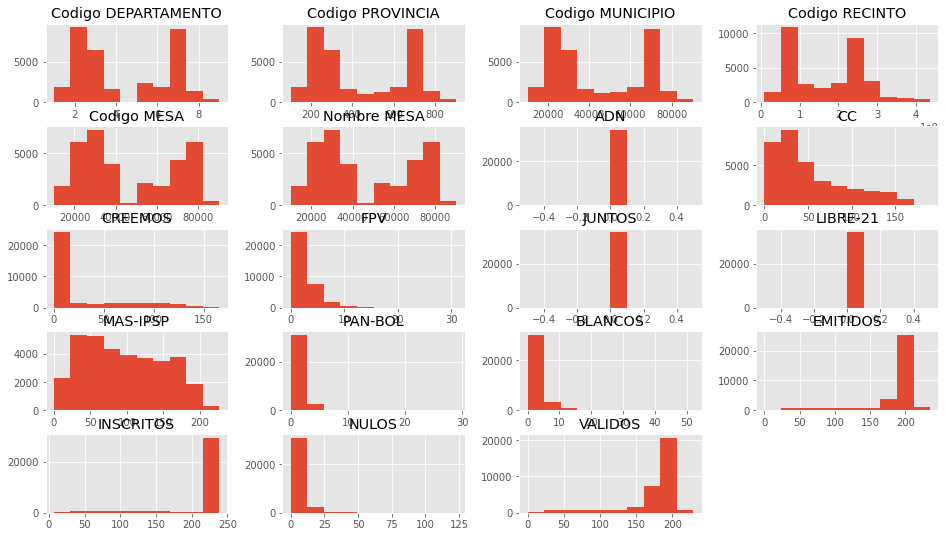

In [16]:
df.drop(['Nombre DEPARTAMENTO'],1).hist()
plt.show()

/Users/ignaciopaz/Library/Python/3.8/lib/python/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


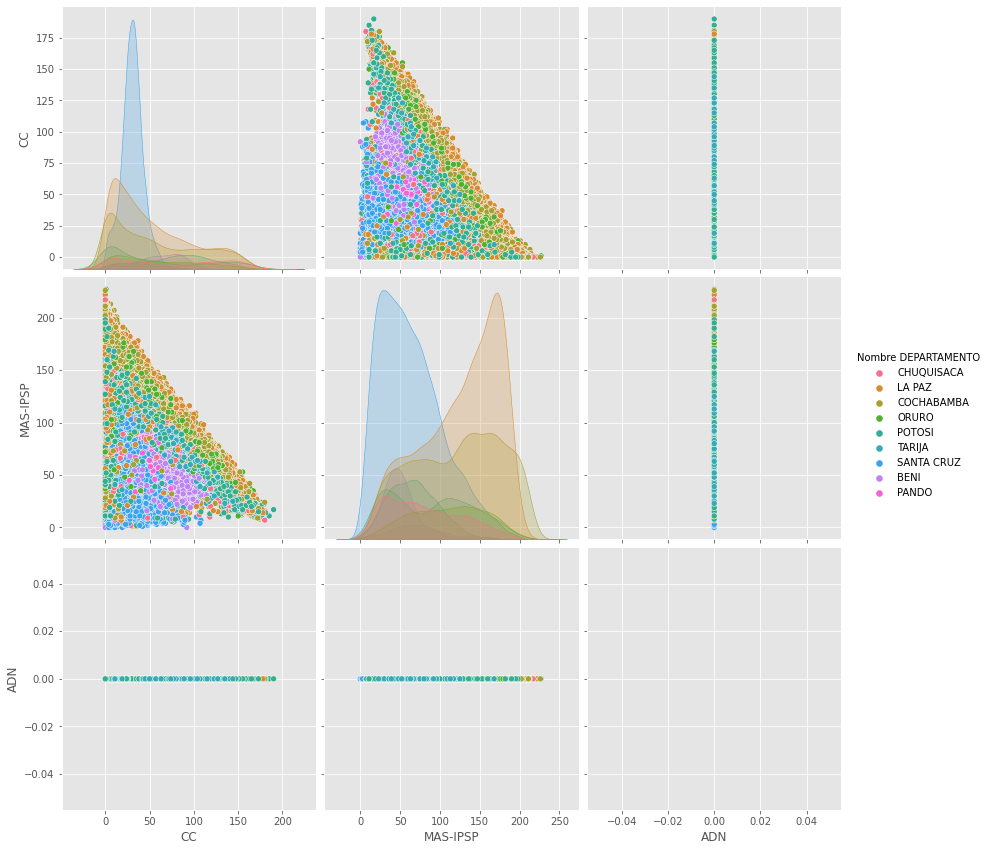

In [22]:
sb.pairplot(df.dropna(), hue='Nombre DEPARTAMENTO',size=4,vars=["CC","MAS-IPSP","ADN"],kind='scatter')